In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [2]:
sagAdat = pd.read_excel("SagittariusA_data.xlsx")

sagAdat["q(m)"] = sagAdat["q (AU)"]*1.496e11
sagAdat["v(m/s)"] = sagAdat["v (%c)"]*0.01*3e8

In [3]:
sagAdat

,id1,id2,a,Δa,e,Δe,i (°),Δi,Ω (°),ΔΩ,...,ΔTp,P (yr),ΔP,Kmag,q (AU),Δq,v (%c),Δv,q(m),v(m/s)
0,S1,S0-1,0.5950,0.0240,0.5560,0.0180,119.14,0.21,342.04,0.32,...,0.150,166.0,5.8,14.70,2160.7,6.7,0.55,0.03,3.232407e+14,1650000.0
1,S2,S0-2,0.1251,0.0001,0.8843,0.0001,133.91,0.05,228.07,0.04,...,0.001,16.1,0.0,13.95,118.4,0.2,2.56,0.00,1.771264e+13,7680000.0
2,S8,S0-4,0.4047,0.0014,0.8031,0.0075,74.37,0.30,315.43,0.19,...,0.240,92.9,0.4,14.50,651.7,22.5,1.07,0.01,9.749432e+13,3210000.0
3,S12,S0-19,0.2987,0.0018,0.8883,0.0017,33.56,0.49,230.10,1.80,...,0.040,58.9,0.2,15.50,272.9,2.0,1.69,0.01,4.082584e+13,5070000.0
4,S13,S0-20,0.2641,0.0016,0.4250,0.0023,24.70,0.48,74.50,1.70,...,0.040,49.0,0.1,15.80,1242.0,2.4,0.69,0.01,1.858032e+14,2070000.0
5,S14,S0-16,0.2863,0.0036,0.9761,0.0037,100.59,0.87,226.38,0.64,...,0.060,55.3,0.5,15.70,56.0,3.8,3.83,0.06,8.377600e+12,11490000.0
6,S62,NaN,0.0905,0.0001,0.9760,0.0020,72.76,4.58,122.61,0.57,...,0.010,9.9,0.0,16.10,16.4,1.5,7.03,0.04,2.453440e+12,21090000.0
7,S4714,NaN,0.1020,0.0120,0.9850,0.0110,127.70,0.28,129.28,0.63,...,0.020,12.0,0.3,17.70,12.6,9.3,8.00,3.00,1.884960e+12,24000000.0


To create the star objects, the only thing we need to input are the initial positions and velocities respectively.

The initial position comes from the 'q(AU)' column of our dataset which represents the pericenter distance, the point at which the star is closest to the central mass. This value is in AU, so to convert it into meters so we can use it for our simulaion: $1 AU = 1.496*10^{11} m$

The initial position is velocity is defined by the column 'v(%c)'. This represents the velocity of the star when it is at the previously mentioned pericenter distance. Since the value is a percentage of the speed of light, we must convert it into m/s to be able to use it in our simulation: $1(percent)= 0.01*3*10^8 m/s$  

In [4]:
%reload_ext autoreload
%autoreload 2
from system import *


# This is a simplified method of creating these star objects
# st_list = []
# for i in range(len(sagAdat["q(m)"])):
#     st_list.append(star([sagAdat["q(m)"][i],0],[0,sagAdat["v(m/s)"][i]]))
    
# creating the star objects using data from s1 on the dataset
s1 = star([(2160.7*1.496e11),0.0],[0.0,(0.55*0.01*3e8)])
s2 = star([(118.4*1.496e11),0.0],[0.0,(2.56*0.01*3e8)])
s8 = star([(651.7*1.496e11),0.0],[0.0,(1.07*0.01*3e8)])
s12 = star([(272.9*1.496e11),0.0],[0.0,(1.69*0.01*3e8)])
s13 = star([(1242*1.496e11),0.0],[0.0,(0.69*0.01*3e8)])

# I ran the numbers... and these stars are apperently moving faster than their escape velocities (???)
s14 = star([(56*1.496e11),0.0],[0.0,(3.83*0.01*3e8)])
s62 = star([(16.4*1.496e11),0.0],[0.0,(7.03*0.01*3e8)])
s4714 = star([(12.6*1.496e11),0.0],[0.0,(8*0.01*3e8)])

st_list = [s1,s2,s8,s12,s13,] # removing problem stars mentioned above

In [5]:
# Note, this may take a while to run

%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline
from IPython.display import display, clear_output

# running the iteration function

tf = 3.154e+7*166 # how long the simulation runs (in seconds)
dt = 3.154e+7/10000 # how long between each timestep (also in seconds)

test_system = system2d(st_list,2e30*4e6)

test_system.iterate(tf,dt)

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

AttributeError: 'star' object has no attribute 'r'

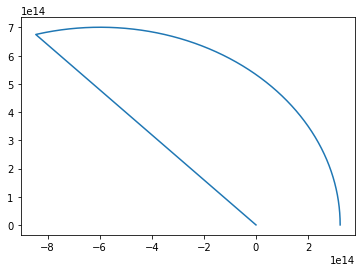

In [6]:
# I wanted to run them for longer, but my computer's slow :(
test_system = system2d(st_list,2e30*4e6)

for i in range(len(st_list)):
    plt.plot(st_list[i].r[:,0],st_list[i].r[:,1])

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


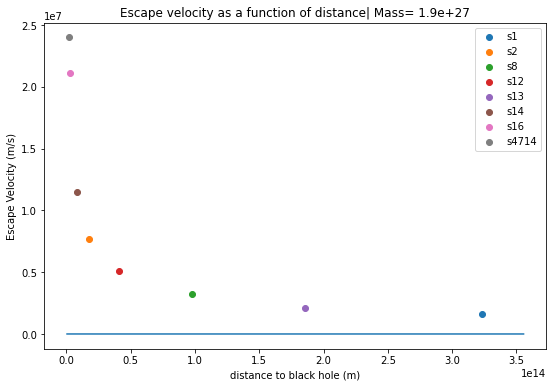

In [12]:
%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline
star_list=[s1,s2,s8,s12,s13,s14,s62,s4714]
plt.figure(figsize=(9,6))
test_system.Escape_velocity(star_list)
labels= ["s1","s2","s8","s12","s13","s14","s16","s4714"]
test_system.ScatterStars(star_list,labels)

### Escape velocity as mass changes

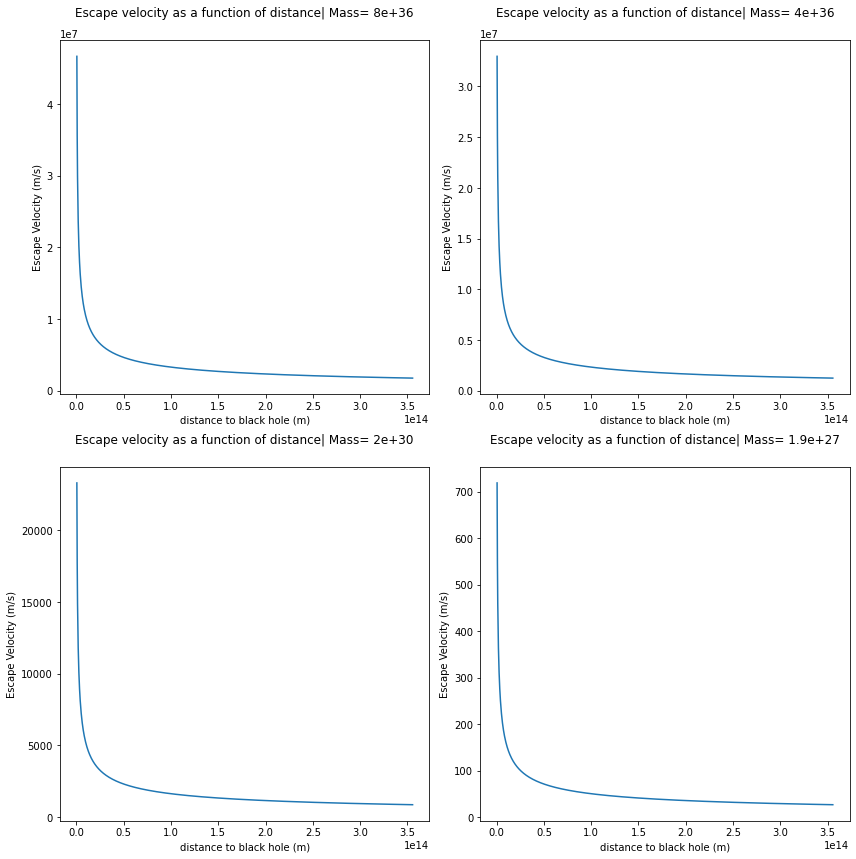

In [8]:
Masses=[2e30*4e6,1e30*4e6]#,sagitarius A,1/2 sag A

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)

test_system = system2d(star_list,2e30*4e6)
test_system.Escape_velocity(star_list)

plt.subplot(2,2,2)

test_system = system2d(star_list,1e30*4e6)
test_system.Escape_velocity(star_list)

plt.subplot(2,2,3)

test_system = system2d(star_list,2e30)
test_system.Escape_velocity(star_list)

plt.subplot(2,2,4)

test_system = system2d(star_list,1.90e27)
test_system.Escape_velocity(star_list)

    

    
plt.tight_layout()